#Project Title : Red Wine Quality

###Problem Statement:

The objective of this project is to develop a predictive model that can accurately predict the quality of Portuguese "Vinho Verde" wine based on its physicochemical properties. The dataset contains features representing various physicochemical attributes of the wine, such as acidity levels, residual sugar, chlorides, sulfur dioxide content, density, pH, sulphates, and alcohol content. The quality of the wine is rated on a scale from 0 to 10, with higher values indicating better quality.

The problem can be formulated as a regression or classification task, depending on how we choose to interpret the output variable. As the quality variable is continuous and ranges from 0 to 10, it can be treated as a regression problem where the goal is to predict the exact quality score of the wine. Alternatively, we can convert the quality scores into discrete classes (e.g., low, medium, high) and treat the problem as a multi-class classification task.

###Dataset

- Input variables based on physicochemical tests:
  1. Fixed acidity
  2. Volatile acidity
  3. Citric acid
  4. Residual sugar
  5. Chlorides
  6. Free sulfur dioxide
  7. Total sulfur dioxide
  8. Density
  9. pH
  10. Sulphates
  11. Alcohol

- Output variable based on sensory data:
  12. Quality (score between 0 and 10)

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/project_List/models/All model and dataset/Red Wine dataset/winequality-red.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.shape

(1599, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


###1. Fixed Acidity vs Quality

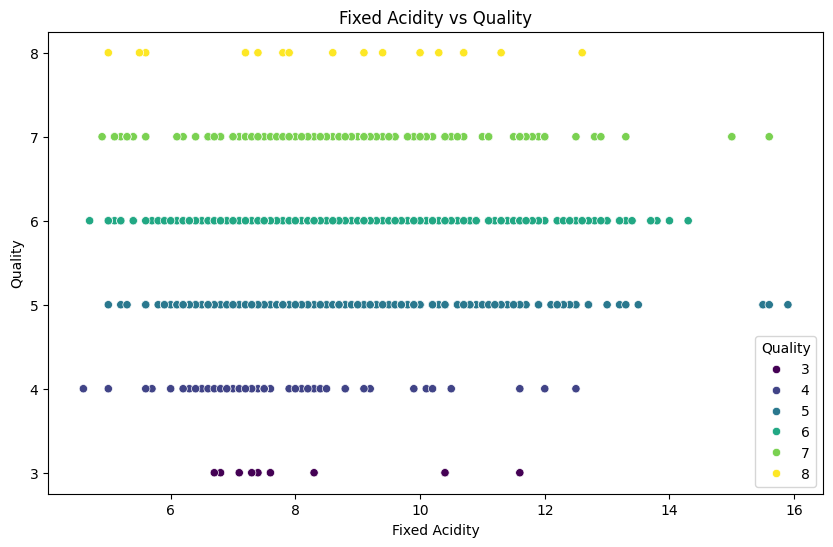

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="fixed acidity", y="quality", hue="quality", palette="viridis", legend='full')
plt.title('Fixed Acidity vs Quality')
plt.xlabel('Fixed Acidity')
plt.ylabel('Quality')
plt.legend(title='Quality')
plt.show()

###2. Volatile Acidity vs Quality

<ipython-input-16-d5eb69702baf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="quality", y="volatile acidity", palette="viridis")


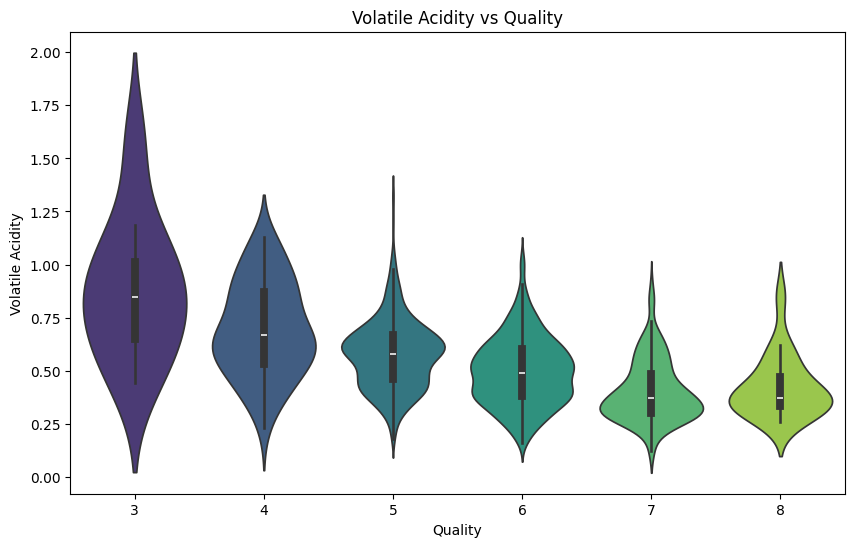

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="quality", y="volatile acidity", palette="viridis")
plt.title('Volatile Acidity vs Quality')
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.show()

###Citric Acid vs Quality

<ipython-input-17-9366f14dc5eb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="quality", y="citric acid", palette="viridis")


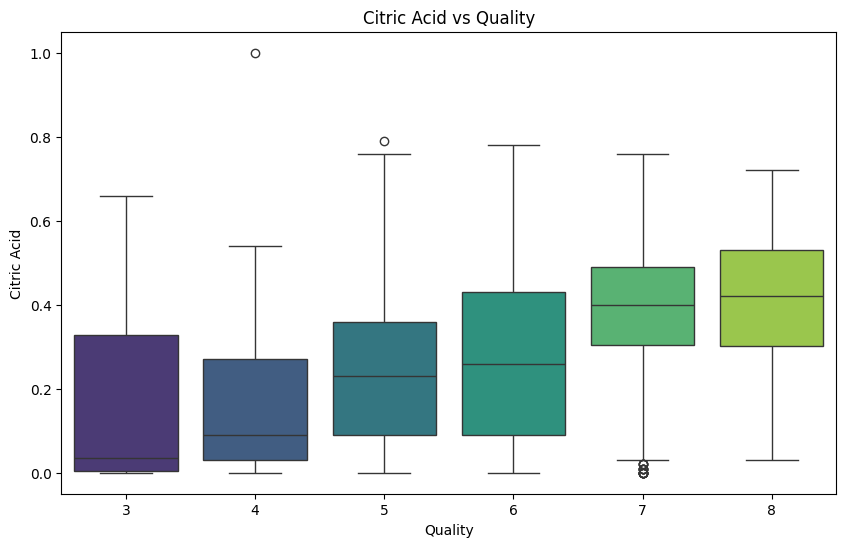

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="quality", y="citric acid", palette="viridis")
plt.title('Citric Acid vs Quality')
plt.xlabel('Quality')
plt.ylabel('Citric Acid')
plt.show()

###Residual Sugar vs Quality

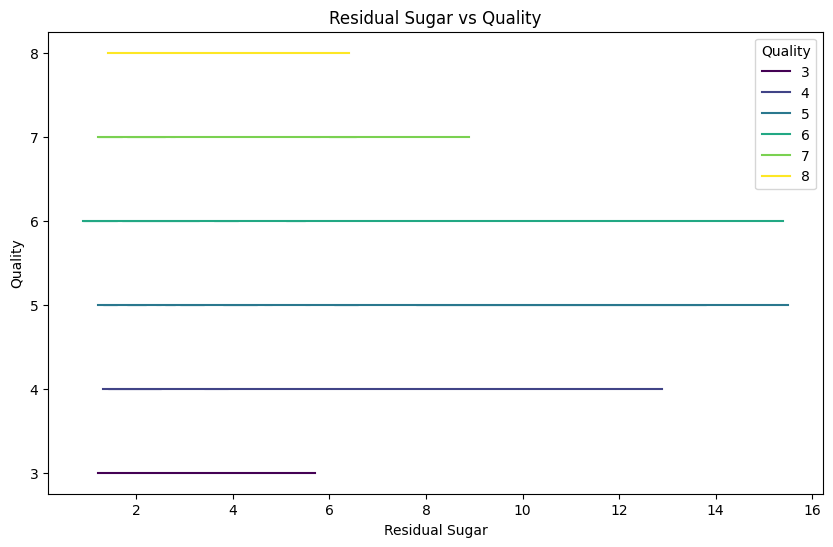

In [18]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="residual sugar", y="quality", hue="quality", palette="viridis", legend='full')
plt.title('Residual Sugar vs Quality')
plt.xlabel('Residual Sugar')
plt.ylabel('Quality')
plt.legend(title='Quality')
plt.show()

###Chlorides vs Quality

<ipython-input-19-533bb1513ca5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="quality", y="chlorides", palette="viridis")


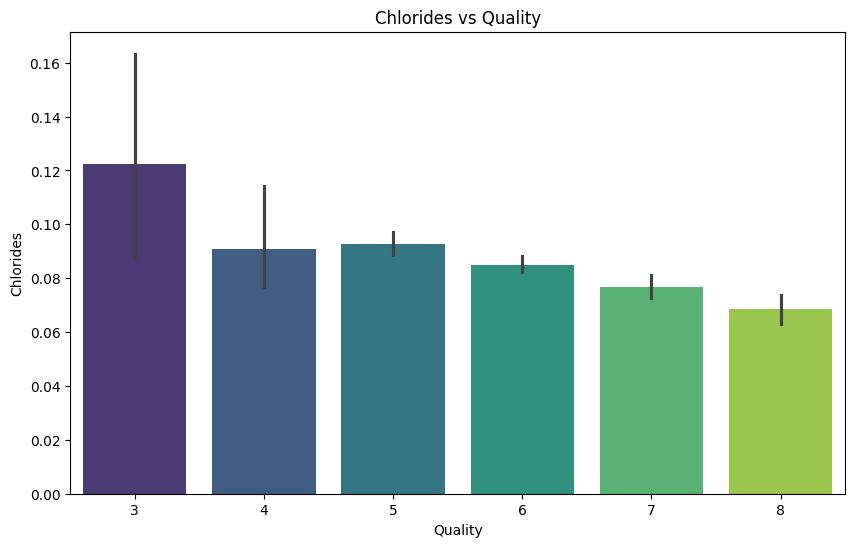

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="quality", y="chlorides", palette="viridis")
plt.title('Chlorides vs Quality')
plt.xlabel('Quality')
plt.ylabel('Chlorides')
plt.show()

###Free Sulfur Dioxide

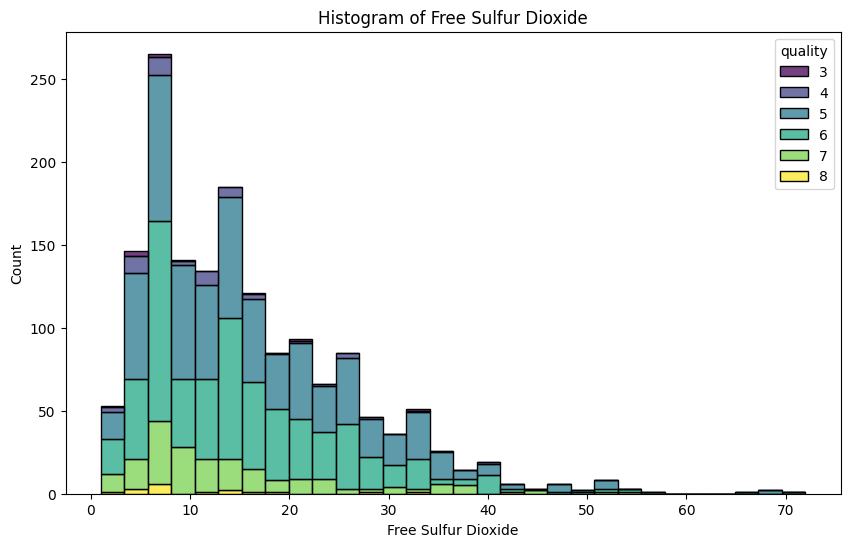

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="free sulfur dioxide", hue="quality", multiple="stack", palette="viridis")
plt.title('Histogram of Free Sulfur Dioxide')
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Count')
plt.show()

###Selected Features

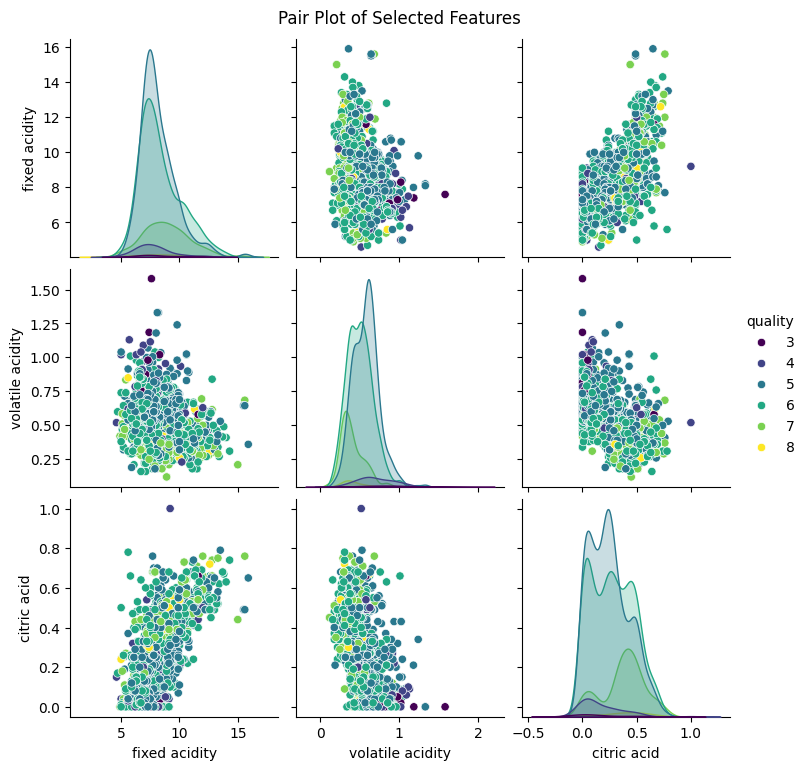

In [21]:
selected_columns = ["fixed acidity", "volatile acidity", "citric acid", "quality"]
sns.pairplot(df[selected_columns], hue="quality", palette="viridis")
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

###Correlation Matrix

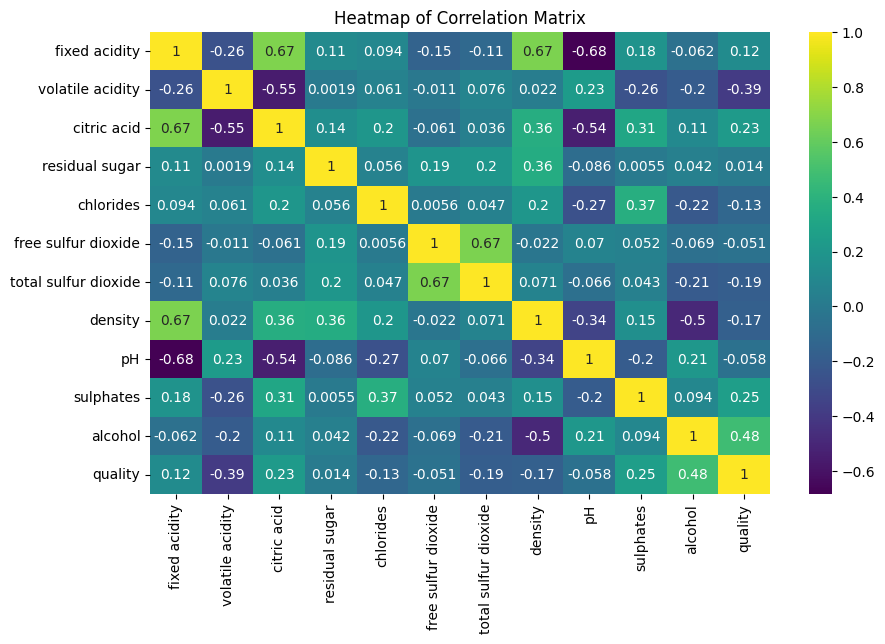

In [22]:
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="viridis")
plt.title('Heatmap of Correlation Matrix')
plt.show()

###Density vs Quality

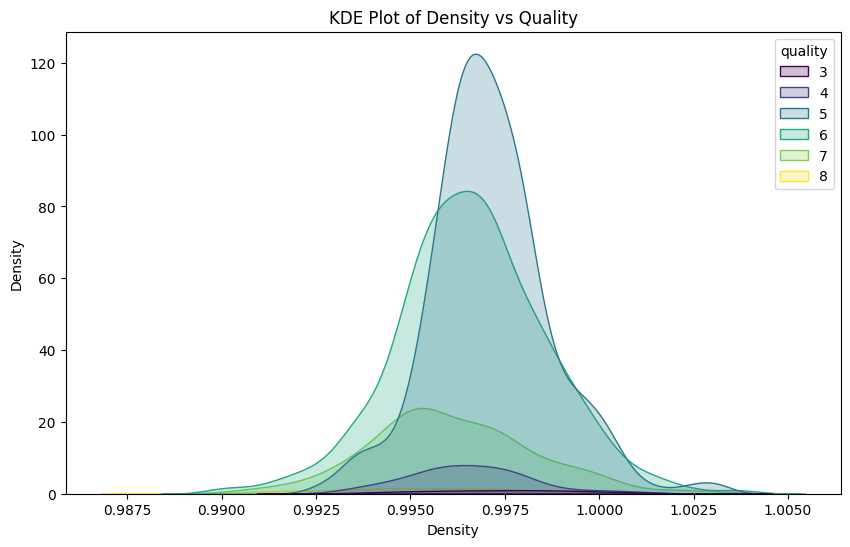

In [23]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="density", hue="quality", palette="viridis", fill=True)
plt.title('KDE Plot of Density vs Quality')
plt.xlabel('Density')
plt.ylabel('Density')
plt.show()

###pH vs Quality

<ipython-input-24-6d35878b9c87>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x="quality", y="pH", palette="viridis")
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 40.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 39.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 43.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/catego

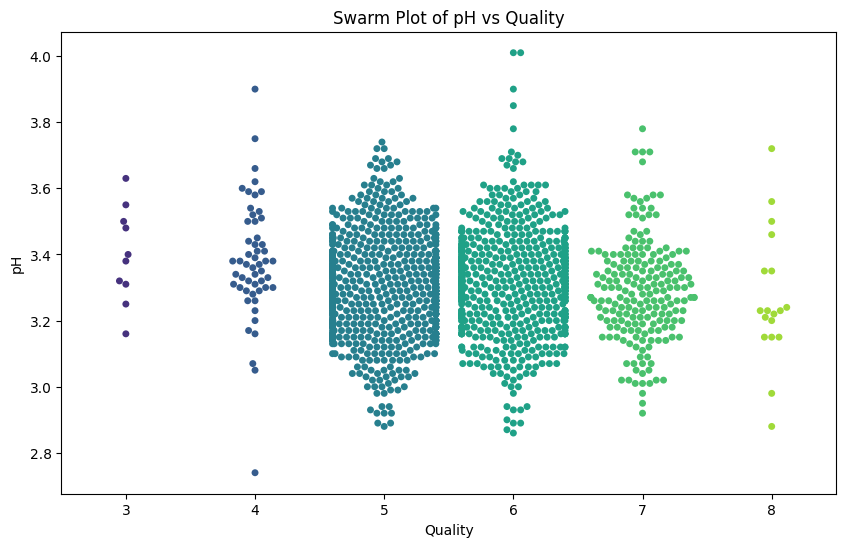

In [24]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x="quality", y="pH", palette="viridis")
plt.title('Swarm Plot of pH vs Quality')
plt.xlabel('Quality')
plt.ylabel('pH')
plt.show()

###Residual Sugar vs Density

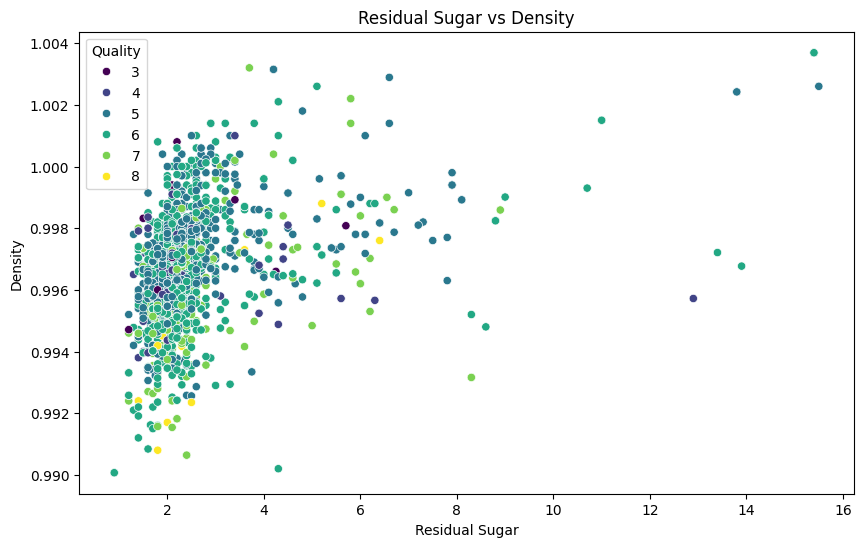

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="residual sugar", y="density", hue="quality", palette="viridis", legend='full')
plt.title('Residual Sugar vs Density')
plt.xlabel('Residual Sugar')
plt.ylabel('Density')
plt.legend(title='Quality')
plt.show()

###Sulphates vs Quality

<ipython-input-26-15bb099c1748>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x="quality", y="sulphates", palette="viridis")


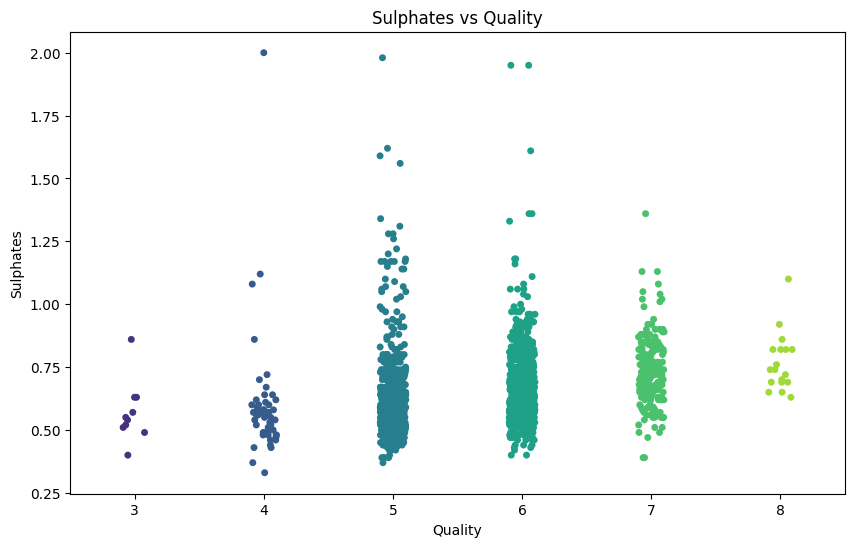

In [26]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x="quality", y="sulphates", palette="viridis")
plt.title('Sulphates vs Quality')
plt.xlabel('Quality')
plt.ylabel('Sulphates')
plt.show()

###Alcohol vs Quality

<ipython-input-27-b37250a668c5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df, x="quality", y="alcohol", palette="viridis")


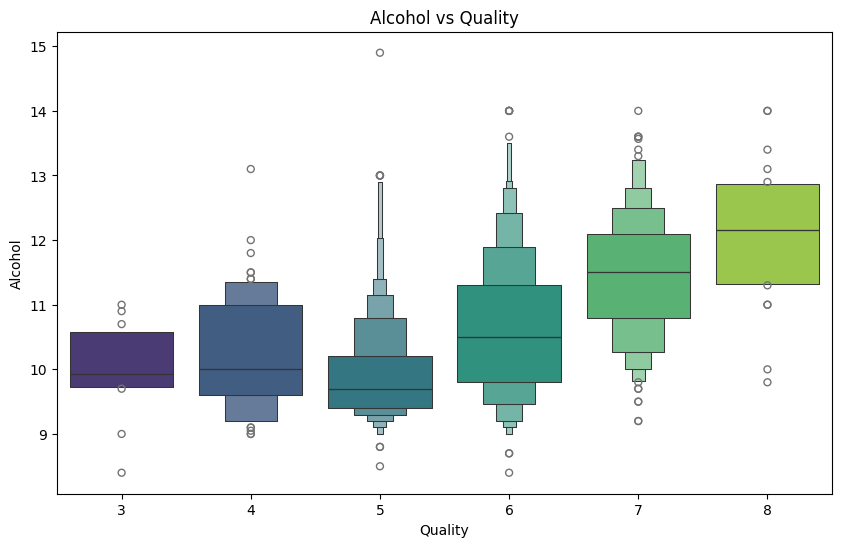

In [27]:
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df, x="quality", y="alcohol", palette="viridis")
plt.title('Alcohol vs Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

###Quality

<ipython-input-28-a06e65e1dffb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="quality", palette="viridis")


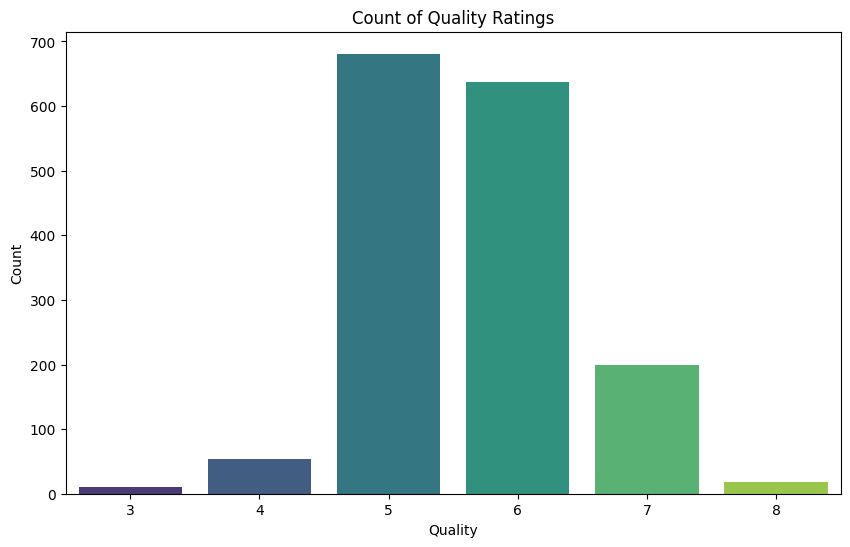

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="quality", palette="viridis")
plt.title('Count of Quality Ratings')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

###Free Sulfur Dioxide vs Quality

<ipython-input-30-60011393c048>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(data=df, x="quality", y="free sulfur dioxide", palette="viridis")


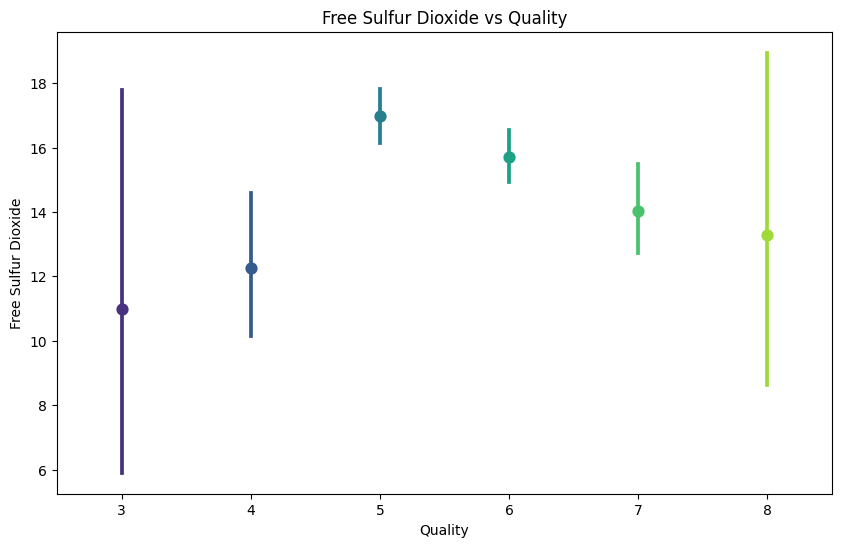

In [30]:
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x="quality", y="free sulfur dioxide", palette="viridis")
plt.title('Free Sulfur Dioxide vs Quality')
plt.xlabel('Quality')
plt.ylabel('Free Sulfur Dioxide')
plt.show()

###Citric Acid vs Fixed Acidity

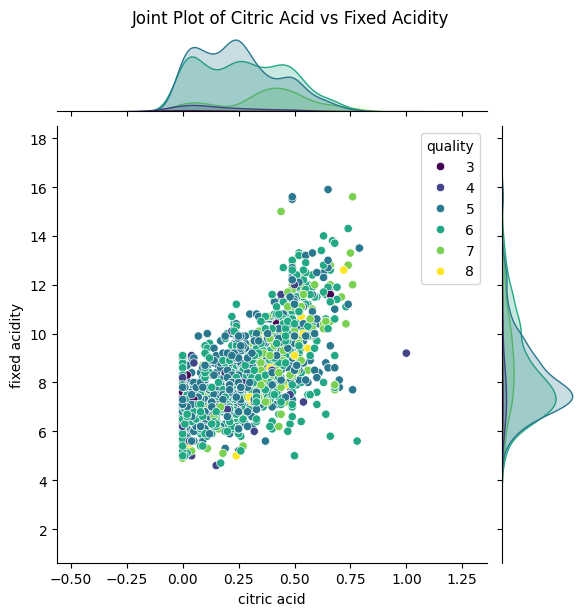

In [31]:
sns.jointplot(data=df, x="citric acid", y="fixed acidity", hue="quality", palette="viridis")
plt.suptitle('Joint Plot of Citric Acid vs Fixed Acidity', y=1.02)
plt.show()

###Total Sulfur Dioxide vs Free Sulfur Dioxide

<Figure size 1000x600 with 0 Axes>

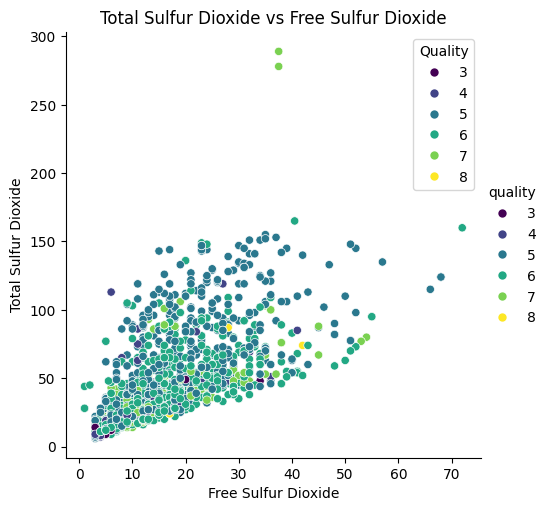

In [33]:
plt.figure(figsize=(10, 6))
sns.relplot(data=df, x="free sulfur dioxide", y="total sulfur dioxide", hue="quality", palette="viridis", kind="scatter")
plt.title('Total Sulfur Dioxide vs Free Sulfur Dioxide')
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Total Sulfur Dioxide')
plt.legend(title='Quality')
plt.show()

###pH vs Alcohol

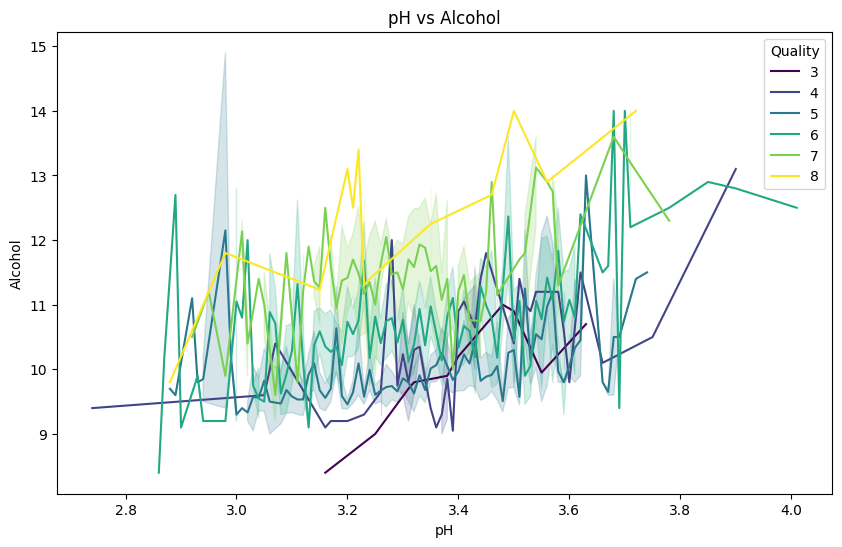

In [34]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="pH", y="alcohol", hue="quality", palette="viridis")
plt.title('pH vs Alcohol')
plt.xlabel('pH')
plt.ylabel('Alcohol')
plt.legend(title='Quality')
plt.show()

In [35]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [36]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [38]:
X = df.drop('quality', axis=1)
y = df['quality']

In [39]:
X[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [40]:
y[:5]

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Split train test

In [62]:
print(f"the train shape {X_train.shape} and {y_train.shape}")
print(f"the train shape {X_test.shape} and {y_test.shape}")

the train shape (1279, 11) and (1279,)
the train shape (320, 11) and (320,)


###Scaling Feature

In [49]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

In [51]:
# Fit and transform the scaler on training data, and transform test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###Linear Regression

In [65]:
#Multiple linear regression is fitted to the training set.
regressor = LinearRegression()
regressor=regressor.fit(X_train_scaled, y_train)

In [66]:
#Evaluate the coefficient
regressor.coef_

array([ 0.26086427, -1.46190447, -0.14082146,  0.09583894, -1.08209539,
        0.3770314 , -1.03137905, -0.1409887 , -0.49998342,  1.37110974,
        1.83228219])

In [67]:
#checking the score
print("The train score is :", round(regressor.score(X_train, y_train),2))
print("The test score is :", round(regressor.score(X_test, y_test),2))

The train score is : -2330.62
The test score is : -2204.96


In [68]:
y_pred_train_linear=regressor.predict(X_train)
y_pred_test_linear=regressor.predict(X_test)

In [69]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_linear_train= mean_squared_error(y_train, y_pred_train_linear)
print("MSE :",MSE_linear_train)

#calculate RMSE
RMSE_linear_train=np.sqrt(MSE_linear_train)
print("RMSE :",RMSE_linear_train)

#calculate MAE
MAE_linear_train= mean_absolute_error(y_train, y_pred_train_linear)
print("MAE :",MAE_linear_train)

#calculate r2 and adjusted r2
R2_linear_train= r2_score(y_train, y_pred_train_linear)
print("R2 :",R2_linear_train)
Adjusted_R2_linear_train = (1-(1-r2_score(y_train, y_pred_train_linear))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_linear_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_linear_test= mean_squared_error(y_test, y_pred_test_linear)
print("MSE :",MSE_linear_test)

#calculate RMSE
RMSE_linear_test=np.sqrt(MSE_linear_test)
print("RMSE :",RMSE_linear_test)

#calculate MAE
MAE_linear_test= mean_absolute_error(y_test, y_pred_test_linear)
print("MAE :",MAE_linear_test)

#calculate r2 and adjusted r2
R2_linear_test= r2_score(y_test, y_pred_test_linear)
print("R2 :",R2_linear_test)
Adjusted_R2_linear_test = (1-(1-r2_score(y_test, y_pred_test_linear))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_linear_test)

Evaluation metrics for training data

MSE : 1516.9338733260408
RMSE : 38.94783528421112
MAE : 26.062720685488124
R2 : -2330.6188098422235
Adjusted R2 : -2413.8909101937315
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 1441.6065549930381
RMSE : 37.96849424184528
MAE : 25.01466112192127
R2 : -2204.958116996475
Adjusted R2 : -2283.742335460635


###Lasso

In [70]:
#Training the lasso regression model using GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
lasso_model_grid = GridSearchCV(lasso, parameters,scoring='neg_mean_squared_error', cv=5)
lasso_model_grid=lasso_model_grid.fit(X_train,y_train)

In [71]:
#Getting the best parameters for Ridge regression fetched through GridSearchCV
print(f'Through GridSearchCV, the optimal value for alpha in lasso regression is: {lasso_model_grid.best_params_}')
print(f'Using {lasso_model_grid.best_params_} as the value of aplha gives us a negative mean squared error of: {lasso_model_grid.best_score_}')

Through GridSearchCV, the optimal value for alpha in lasso regression is: {'alpha': 0.01}
Using {'alpha': 0.01} as the value of aplha gives us a negative mean squared error of: -0.44779313025204565


In [72]:
#Fit Model
lasso_model=Lasso(alpha=0.02).fit(X_train,y_train)

In [73]:
#Predict train & test values
y_pred_train_lasso=lasso_model.predict(X_train)
y_pred_test_lasso=lasso_model.predict(X_test)

In [74]:
#checking the score
print("The train score is :", round(lasso_model.score(X_train, y_train),2))
print("The test score is :", round(lasso_model.score(X_test, y_test),2))

The train score is : 0.3
The test score is : 0.32


In [75]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_lasso_train= mean_squared_error(y_train, y_pred_train_lasso)
print("MSE :",MSE_lasso_train)

#calculate RMSE
RMSE_lasso_train=np.sqrt(MSE_lasso_train)
print("RMSE :",RMSE_lasso_train)

#calculate MAE
MAE_lasso_train= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_lasso_train)

#calculate r2 and adjusted r2
R2_lasso_train= r2_score(y_train,y_pred_train_lasso)
print("R2 :",R2_lasso_train)
Adjusted_R2_lasso_train = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_lasso_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_lasso_test= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_lasso_test)

#calculate RMSE
RMSE_lasso_test=np.sqrt(MSE_lasso_test)
print("RMSE :",RMSE_lasso_test)

#calculate MAE
MAE_lasso_test= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_lasso_test)

#calculate r2 and adjusted r2
R2_lasso_test= r2_score(y_test, y_pred_test_lasso)
print("R2 :",R2_lasso_test)
Adjusted_R2_lasso_test = (1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lasso_test)

Evaluation metrics for training data

MSE : 0.45305542339953125
RMSE : 0.6730939187063951
MAE : 0.5196074330334043
R2 : 0.30362650233183
Adjusted R2 : 0.27875602027225244
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 0.44128261661928325
RMSE : 0.6642910631788472
MAE : 0.5346346632906885
R2 : 0.3247457382534915
Adjusted R2 : 0.30062951461968757


###RIDGE REGRESSION

In [76]:
#Training the ridge regression model using GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
ridge_model_grid = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)
ridge_model_grid=ridge_model_grid.fit(X_train,y_train)

In [77]:
#Getting the best parameters for Ridge regression fetched through GridSearchCV
print(f'Through GridSearchCV, the optimal value for alpha in ridge regression is: {ridge_model_grid.best_params_}')
print(f'Using {ridge_model_grid.best_params_} as the value of aplha gives us a negative mean squared error of: {ridge_model_grid.best_score_}')

Through GridSearchCV, the optimal value for alpha in ridge regression is: {'alpha': 0.5}
Using {'alpha': 0.5} as the value of aplha gives us a negative mean squared error of: -0.43919126137052655


In [78]:
#Fit Model
ridge_model=Ridge(alpha=1.0).fit(X_train,y_train)

In [79]:
#Predict train & test values
y_pred_train_ridge=ridge_model.predict(X_train)
y_pred_test_ridge=ridge_model.predict(X_test)

In [80]:
#checking the score
print("The train score is :", round(ridge_model.score(X_train, y_train),2))
print("The test score is :", round(ridge_model.score(X_test, y_test),2))

The train score is : 0.35
The test score is : 0.4


In [81]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_ridge_train= mean_squared_error(y_train, y_pred_train_ridge)
print("MSE :",MSE_ridge_train)

#calculate RMSE
RMSE_ridge_train=np.sqrt(MSE_ridge_train)
print("RMSE :",RMSE_ridge_train)

#calculate MAE
MAE_ridge_train= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_ridge_train)

#calculate r2 and adjusted r2
R2_ridge_train= r2_score(y_train,y_pred_train_ridge)
print("R2 :",R2_ridge_train)
Adjusted_R2_ridge_train = (1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_ridge_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_ridge_test= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_ridge_test)

#calculate RMSE
RMSE_ridge_test=np.sqrt(MSE_ridge_test)
print("RMSE :",RMSE_ridge_test)

#calculate MAE
MAE_ridge_test= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_ridge_test)

#calculate r2 and adjusted r2
R2_ridge_test= r2_score(y_test, y_pred_test_ridge)
print("R2 :",R2_ridge_test)
Adjusted_R2_ridge_test = (1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_ridge_test)

Evaluation metrics for training data

MSE : 0.42487477917645844
RMSE : 0.6518241934574525
MAE : 0.5001398553389633
R2 : 0.34694185133904776
Adjusted R2 : 0.32361834602972794
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 0.3929488678812799
RMSE : 0.6268563375138516
MAE : 0.5057883195080455
R2 : 0.3987064350775855
Adjusted R2 : 0.37723166490178495


###ElasticNet Regression

In [82]:
#Training the ElasticNet regression model using GridSearchCV
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)

elastic = ElasticNet()
parameters = {'alpha': [1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_model_grid = GridSearchCV(elastic, parameters,scoring='neg_mean_squared_error', cv=5)
elastic_model_grid=elastic_model_grid.fit(X_train,y_train)

In [83]:
#Getting the best parameters for elastcinet regression
print(f'Through GridSearchCV, the optimal value for alpha in elasticnet regression is: {elastic_model_grid.best_params_}')
print(f'Using {elastic_model_grid.best_params_} as the value of aplha gives us a negative mean squared error of: {elastic_model_grid.best_score_}')

Through GridSearchCV, the optimal value for alpha in elasticnet regression is: {'alpha': 0.01, 'l1_ratio': 0.1}
Using {'alpha': 0.01, 'l1_ratio': 0.1} as the value of aplha gives us a negative mean squared error of: -0.4443298058791605


In [84]:
#Fitting the elastic regression model
elasticnet_model=ElasticNet(alpha=0.01,l1_ratio=0.5).fit(X_train,y_train)

In [85]:
#Predict train & test values
y_pred_train_elastic=elasticnet_model.predict(X_train)
y_pred_test_elastic=elasticnet_model.predict(X_test)

In [86]:
#checking the score
print("The train score is :", round(elasticnet_model.score(X_train, y_train),2))
print("The test score is :", round(elasticnet_model.score(X_test, y_test),2))

The train score is : 0.33
The test score is : 0.37


In [87]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_elastic_train= mean_squared_error(y_train, y_pred_train_elastic)
print("MSE :",MSE_elastic_train)

#calculate RMSE
RMSE_elastic_train=np.sqrt(MSE_elastic_train)
print("RMSE :",RMSE_elastic_train)

#calculate MAE
MAE_elastic_train= mean_absolute_error(y_train, y_pred_train_elastic)
print("MAE :",MAE_elastic_train)

#calculate r2 and adjusted r2
R2_elastic_train= r2_score(y_train,y_pred_train_elastic)
print("R2 :",R2_elastic_train)
Adjusted_R2_elastic_train = (1-(1-r2_score(y_train, y_pred_train_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_elastic_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_elastic_test= mean_squared_error(y_test, y_pred_test_elastic)
print("MSE :",MSE_elastic_test)

#calculate RMSE
RMSE_elastic_test=np.sqrt(MSE_elastic_test)
print("RMSE :",RMSE_elastic_test)

#calculate MAE
MAE_elastic_test= mean_absolute_error(y_test, y_pred_test_elastic)
print("MAE :",MAE_elastic_test)

#calculate r2 and adjusted r2
R2_elastic_test= r2_score(y_test, y_pred_test_elastic)
print("R2 :",R2_elastic_test)
Adjusted_R2_elastic_test = (1-(1-r2_score(y_test, y_pred_test_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_elastic_test)

Evaluation metrics for training data

MSE : 0.4354458819733837
RMSE : 0.6598832335901433
MAE : 0.505889689418184
R2 : 0.33069342907391397
Adjusted R2 : 0.3067896229694108
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 0.41410031584218243
RMSE : 0.6435062671351247
MAE : 0.5185457293231155
R2 : 0.36634031676744305
Adjusted R2 : 0.34370961379485165


###Decision Tree

In [88]:
#Fit Model
dec_regressor = DecisionTreeRegressor(max_depth=10,max_features=10, max_leaf_nodes=200,random_state=0)
dec_regressor=dec_regressor.fit(X_train, y_train)

In [89]:
#Predict train & test values
y_pred_train_dec = dec_regressor.predict(X_train)
y_pred_test_dec = dec_regressor.predict(X_test)

In [90]:
#checking the score
print("The train score is :", round(dec_regressor.score(X_train, y_train),2))
print("The test score is :", round(dec_regressor.score(X_test, y_test),2))

The train score is : 0.82
The test score is : 0.14


In [91]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_dec_train= mean_squared_error(y_train, y_pred_train_dec)
print("MSE :",MSE_dec_train)

#calculate RMSE
RMSE_dec_train=np.sqrt(MSE_dec_train)
print("RMSE :",RMSE_dec_train)

#calculate MAE
MAE_dec_train= mean_absolute_error(y_train, y_pred_train_dec)
print("MAE :",MAE_dec_train)

#calculate r2 and adjusted r2
R2_dec_train= r2_score(y_train,y_pred_train_dec)
print("R2 :",R2_dec_train)
Adjusted_R2_dec_train = (1-(1-r2_score(y_train, y_pred_train_dec))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_dec_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_dec_test= mean_squared_error(y_test, y_pred_test_dec)
print("MSE :",MSE_dec_test)

#calculate RMSE
RMSE_dec_test=np.sqrt(MSE_dec_test)
print("RMSE :",RMSE_dec_test)

#calculate MAE
MAE_dec_test= mean_absolute_error(y_test, y_pred_test_dec)
print("MAE :",MAE_dec_test)

#calculate r2 and adjusted r2
R2_dec_test= r2_score(y_test, y_pred_test_dec)
print("R2 :",R2_dec_test)
Adjusted_R2_dec_test = (1-(1-r2_score(y_test, y_pred_test_dec))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_dec_test)

Evaluation metrics for training data

MSE : 0.11587065533122744
RMSE : 0.3403977898448041
MAE : 0.19291171527304715
R2 : 0.8218998176323491
Adjusted R2 : 0.8155390968335043
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 0.5609963319655333
RMSE : 0.748996883815636
MAE : 0.5110724362866131
R2 : 0.14155883391457413
Adjusted R2 : 0.11090022084009454


###Random Forest Regressor

In [92]:
# #creating paramdict to check random forest with diffirent value of parameter through gridsearch
rf_model= RandomForestRegressor()
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [93]:
#Fit Model
rf_regressor= GridSearchCV(rf_model,param_grid=params,verbose=0)
rf_regressor=rf_regressor.fit(X_train,y_train)

In [94]:
optimal_rf_model=rf_regressor.best_estimator_

In [95]:
#Predict train & test values
y_pred_train_rf = optimal_rf_model.predict(X_train)
y_pred_test_rf = optimal_rf_model.predict(X_test)

In [96]:
#checking the score
print("The train score is :", round(optimal_rf_model.score(X_train, y_train),2))
print("The test score is :", round(optimal_rf_model.score(X_test, y_test),2))

The train score is : 0.75
The test score is : 0.48


In [97]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_rf_train= mean_squared_error(y_train, y_pred_train_rf)
print("MSE :",MSE_rf_train)

#calculate RMSE
RMSE_rf_train=np.sqrt(MSE_rf_train)
print("RMSE :",RMSE_rf_train)

#calculate MAE
MAE_rf_train= mean_absolute_error(y_train, y_pred_train_rf)
print("MAE :",MAE_rf_train)

#calculate r2 and adjusted r2
R2_rf_train= r2_score(y_train,y_pred_train_rf)
print("R2 :",R2_rf_train)
Adjusted_R2_rf_train = (1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_rf_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_rf_test= mean_squared_error(y_test, y_pred_test_rf)
print("MSE :",MSE_rf_test)

#calculate RMSE
RMSE_rf_test=np.sqrt(MSE_rf_test)
print("RMSE :",RMSE_rf_test)

#calculate MAE
MAE_rf_test= mean_absolute_error(y_test, y_pred_test_rf)
print("MAE :",MAE_rf_test)

#calculate r2 and adjusted r2
R2_rf_test= r2_score(y_test, y_pred_test_rf)
print("R2 :",R2_rf_test)
Adjusted_R2_rf_test = (1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_rf_test)

Evaluation metrics for training data

MSE : 0.15980001470172608
RMSE : 0.3997499402147874
MAE : 0.30527850828573966
R2 : 0.7543777440511241
Adjusted R2 : 0.7456055206243786
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 0.33943153322439773
RMSE : 0.5826075293234698
MAE : 0.4630023684988468
R2 : 0.48059909738372775
Adjusted R2 : 0.46204906514743227


###GRADIENT BOOSTING

In [98]:
# Create an instance of the GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor()
gb_regressor=gb_regressor.fit(X_train,y_train)

In [99]:
#Predict train & test values
y_pred_train_gb = gb_regressor.predict(X_train)
y_pred_test_gb = gb_regressor.predict(X_test)

In [100]:
#checking the score
print("The train score is :", round(gb_regressor.score(X_train, y_train),2))
print("The test score is :", round(gb_regressor.score(X_test, y_test),2))

The train score is : 0.62
The test score is : 0.45


In [101]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_gb_train= mean_squared_error(y_train, y_pred_train_gb)
print("MSE :",MSE_gb_train)

#calculate RMSE
RMSE_gb_train=np.sqrt(MSE_gb_train)
print("RMSE :",RMSE_gb_train)

#calculate MAE
MAE_gb_train= mean_absolute_error(y_train, y_pred_train_gb)
print("MAE :",MAE_gb_train)

#calculate r2 and adjusted r2
R2_gb_train= r2_score(y_train,y_pred_train_gb)
print("R2 :",R2_gb_train)
Adjusted_R2_gb_train = (1-(1-r2_score(y_train, y_pred_train_gb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_gb_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_gb_test= mean_squared_error(y_test, y_pred_test_gb)
print("MSE :",MSE_gb_test)

#calculate RMSE
RMSE_gb_test=np.sqrt(MSE_gb_test)
print("RMSE :",RMSE_gb_test)

#calculate MAE
MAE_gb_test= mean_absolute_error(y_test, y_pred_test_gb)
print("MAE :",MAE_gb_test)

#calculate r2 and adjusted r2
R2_gb_test= r2_score(y_test, y_pred_test_gb)
print("R2 :",R2_gb_test)
Adjusted_R2_gb_test = (1-(1-r2_score(y_test, y_pred_test_gb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_gb_test)

Evaluation metrics for training data

MSE : 0.248969969192032
RMSE : 0.498968906037272
MAE : 0.3873293051378686
R2 : 0.6173181484957118
Adjusted R2 : 0.6036509395134158
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 0.36246430162899756
RMSE : 0.6020500823262112
MAE : 0.4852514580009192
R2 : 0.445354167175102
Adjusted R2 : 0.4255453874313556


###XG Boost

In [103]:
# #creating paramdict to check XGBoost with diffirent value of parameter through gridsearch
xgb_model=XGBRegressor()
n_estimators = [50,80,100]
max_depth = [4,6,8]
min_samples_split = [50,100,150]
min_samples_leaf = [40,50]
param_dict = {'n_estimators' : n_estimators,'max_depth' : max_depth,'min_samples_split' : min_samples_split,'min_samples_leaf' : min_samples_leaf}

In [104]:
xgb_grid = GridSearchCV(estimator=xgb_model,param_grid = param_dict,cv = 5, verbose=2)
xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.1s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [105]:
xgb_grid.best_params_

{'max_depth': 6,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 50}

In [106]:
xgb_optimal_model = xgb_grid.best_estimator_

In [107]:
#Predict train & test values
y_pred_train_xgb = xgb_optimal_model.predict(X_train)
y_pred_test_xgb = xgb_optimal_model.predict(X_test)

In [108]:
#checking the score
print("The train score is :", round(xgb_optimal_model.score(X_train, y_train),2))
print("The test score is :", round(xgb_optimal_model.score(X_test, y_test),2))

The train score is : 0.97
The test score is : 0.47


In [109]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_xgb_train= mean_squared_error(y_train, y_pred_train_xgb)
print("MSE :",MSE_xgb_train)

#calculate RMSE
RMSE_xgb_train=np.sqrt(MSE_xgb_train)
print("RMSE :",RMSE_xgb_train)

#calculate MAE
MAE_xgb_train= mean_absolute_error(y_train, y_pred_train_xgb)
print("MAE :",MAE_xgb_train)

#calculate r2 and adjusted r2
R2_xgb_train= r2_score(y_train,y_pred_train_xgb)
print("R2 :",R2_xgb_train)
Adjusted_R2_xgb_train = (1-(1-r2_score(y_train, y_pred_train_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_xgb_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_xgb_test= mean_squared_error(y_test, y_pred_test_xgb)
print("MSE :",MSE_xgb_test)

#calculate RMSE
RMSE_xgb_test=np.sqrt(MSE_xgb_test)
print("RMSE :",RMSE_xgb_test)

#calculate MAE
MAE_xgb_test= mean_absolute_error(y_test, y_pred_test_xgb)
print("MAE :",MAE_xgb_test)

#calculate r2 and adjusted r2
R2_xgb_test= r2_score(y_test, y_pred_test_xgb)
print("R2 :",R2_xgb_test)
Adjusted_R2_xgb_test = (1-(1-r2_score(y_test, y_pred_test_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_xgb_test)

Evaluation metrics for training data

MSE : 0.016581486599560713
RMSE : 0.12876912129684162
MAE : 0.08890103771874829
R2 : 0.9745132555014329
Adjusted R2 : 0.973603014626484
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 0.349395058290788
RMSE : 0.5910964881394475
MAE : 0.42801803424954415
R2 : 0.46535283000378536
Adjusted R2 : 0.44625828821820623


###Result of all models

In [110]:
list_of_model = ['Linear regression','Lasso regression','Ridge regression','Elastic regression','Decision Tree','Random Forest','Gradient Boosting','Extreme Gradient Boosting']

In [111]:
result_list_MSE = [MSE_linear_test,MSE_lasso_test,MSE_ridge_test,MSE_elastic_test,MSE_dec_test,MSE_rf_test,MSE_gb_test,MSE_xgb_test]
result_list_RMSE = [RMSE_linear_test,RMSE_lasso_test,RMSE_ridge_test,RMSE_elastic_test,RMSE_dec_test,RMSE_rf_test,RMSE_gb_test,RMSE_xgb_test]
result_list_MAE = [MAE_linear_test,MAE_lasso_test,MAE_ridge_test,MAE_elastic_test,MAE_dec_test,MAE_rf_test,MAE_gb_test,MAE_xgb_test]
result_list_R2 = [R2_linear_test,R2_lasso_test,R2_ridge_test,R2_elastic_test,R2_dec_test,R2_rf_test,R2_gb_test,R2_xgb_test]
relust_list_adjusted_R2=[Adjusted_R2_linear_test,Adjusted_R2_lasso_test,Adjusted_R2_ridge_test,Adjusted_R2_elastic_test,Adjusted_R2_dec_test,Adjusted_R2_rf_test,Adjusted_R2_gb_test,Adjusted_R2_xgb_test]

In [112]:
# creating an empty dataframe
results_df = pd.DataFrame()

In [113]:
#adding above lists to the empty dataframe
results_df['model_name'] = list_of_model
results_df['MSE_score'] = result_list_MSE
results_df['RMSE_score'] = result_list_RMSE
results_df['MAE_score'] = result_list_MAE
results_df['R2_score'] = result_list_R2
results_df['Adjusted_R2_score'] = relust_list_adjusted_R2

In [115]:
results_df.style.set_properties(**{'text-align': 'center'}).background_gradient(cmap='RdYlBu_r').format()

,model_name,MSE_score,RMSE_score,MAE_score,R2_score,Adjusted_R2_score
0,Linear regression,1441.606555,37.968494,25.014661,-2204.958117,-2283.742335
1,Lasso regression,0.441283,0.664291,0.534635,0.324746,0.300630
2,Ridge regression,0.392949,0.626856,0.505788,0.398706,0.377232
3,Elastic regression,0.414100,0.643506,0.518546,0.366340,0.343710
4,Decision Tree,0.560996,0.748997,0.511072,0.141559,0.110900
5,Random Forest,0.339432,0.582608,0.463002,0.480599,0.462049
6,Gradient Boosting,0.362464,0.602050,0.485251,0.445354,0.425545
7,Extreme Gradient Boosting,0.349395,0.591096,0.428018,0.465353,0.446258


Based on these metrics, the algorithm with the lowest MSE, RMSE, and MAE scores, and the highest R^2 and Adjusted R^2 scores is Random Forest. Therefore, Random Forest is performing the best among the provided algorithms.